In [57]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, HTML

In [11]:
data = pd.read_csv('./heart_cleveland_upload.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


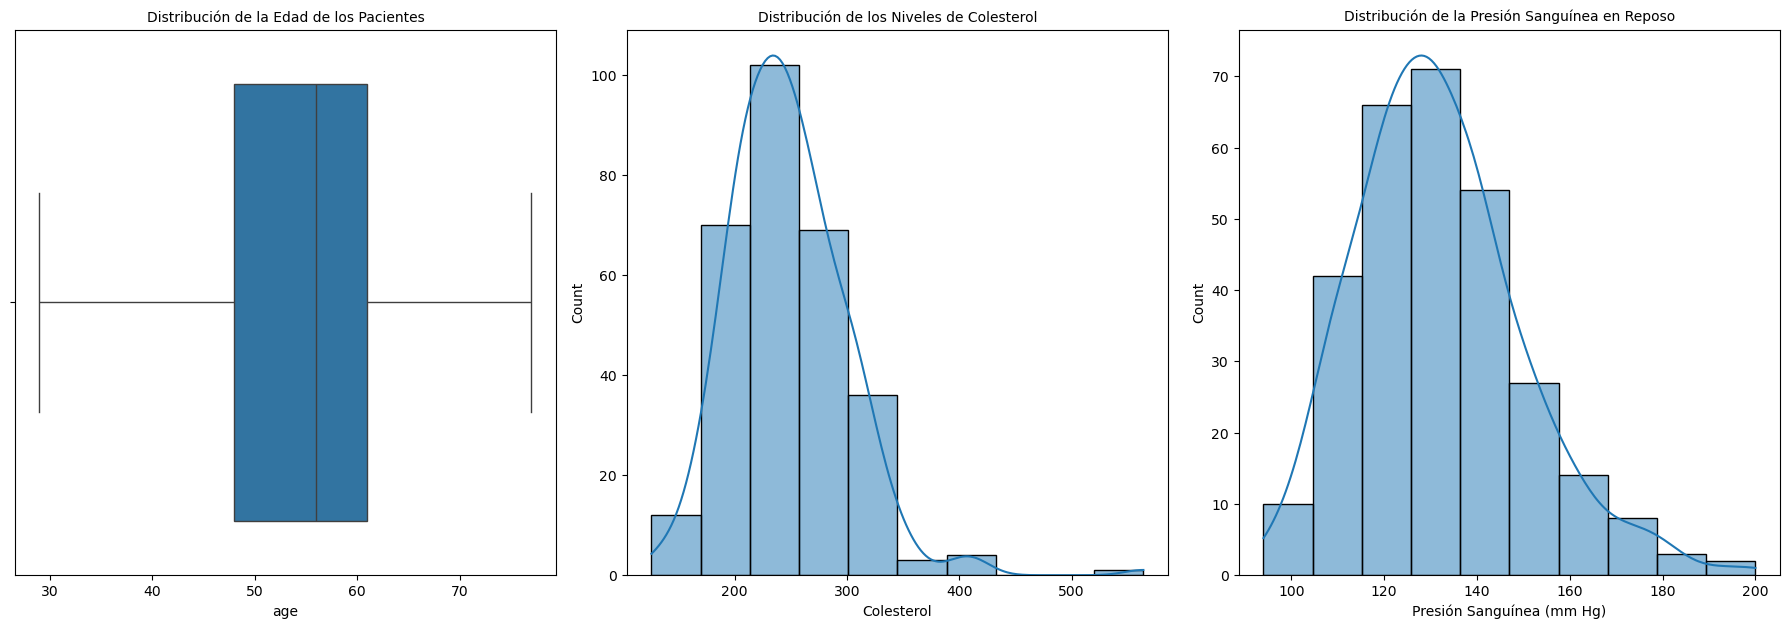

In [39]:
plt.figure(figsize=(18, 12))

# Boxplot de la edad
plt.subplot(2, 3, 1)
sns.boxplot(x=data['age'])
plt.title('Distribución de la Edad de los Pacientes', fontsize=10)

# Histograma de colesterol
plt.subplot(2, 3, 2)
sns.histplot(data['chol'], bins=10, kde=True)
plt.title('Distribución de los Niveles de Colesterol', fontsize=10)
plt.xlabel('Colesterol')

# Histograma de presión sanguínea
plt.subplot(2, 3, 3)
sns.histplot(data['trestbps'], bins=10, kde=True)
plt.title('Distribución de la Presión Sanguínea en Reposo', fontsize=10)
plt.xlabel('Presión Sanguínea (mm Hg)')

plt.tight_layout()
plt.show()

In [67]:
#Revisión de datos faltantes
display(HTML("<h2 style='font-size:20px;'>Cantidad de Registros en cero</h1>"))
print("Presion arterial en reposo: ",data['trestbps'].isin([0]).sum()) 
print("Frecuencia cardiaca maxima alcanzada: ",data['thalach'].isin([0]).sum())
print("Colesterol serico en mg/dl: ",data['chol'].isin([0]).sum())

Presion arterial en reposo:  0
Frecuencia cardiaca maxima alcanzada:  0
Colesterol serico en mg/dl:  0


In [97]:
display(HTML("<h2 style='font-size:20px;'>Datos atípicos</h1>"))
nivel_minimo=60
nivel_maximo=200
Total_Atipicos=((data['thalach']<nivel_minimo)|(data['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))


El total de datos atípicos es 0


In [105]:
data=data[(data['thalach']<nivel_maximo)&(data['thalach']>nivel_minimo)]

Total_Atipicos=((data['thalach']<nivel_minimo)|(data['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 4 to 294
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        97 non-null     int64  
 1   sex        97 non-null     int64  
 2   cp         97 non-null     int64  
 3   trestbps   97 non-null     int64  
 4   chol       97 non-null     int64  
 5   fbs        97 non-null     int64  
 6   restecg    97 non-null     int64  
 7   thalach    97 non-null     int64  
 8   exang      97 non-null     int64  
 9   oldpeak    97 non-null     float64
 10  slope      97 non-null     int64  
 11  ca         97 non-null     int64  
 12  thal       97 non-null     int64  
 13  condition  97 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 11.4 KB


In [119]:
display(HTML("<h2 style='font-size:20px;'>Personas con condiciones cardiacas</h1>"))
data['condition'].value_counts()

condition
0    60
1    37
Name: count, dtype: int64

In [115]:
data[['condition']].head(10)

,condition
4,0
14,0
15,0
18,1
21,1
22,0
23,0
28,1
31,1
36,0


In [121]:
X = data.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = data['condition'] # Se cargan los datos de train con los datos de la la columna condition

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [127]:
display(HTML("<h2 style='font-size:20px;'>Datos de entrenamiento</h1>"))
print(X_train)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
73    71    0   2       110   265    1        2      130      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
256   52    1   3       108   233    1        0      147      0      0.1   
36    56    1   1       120   240    0        0      169      0      0.0   
286   43    1   3       110   211    0        0      161      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
148   41    1   2       112   250    0        0      179      0      0.0   
271   47    1   3       112   204    0        0      143      0      0.1   
274   46    1   3       120   249    0        2      144      0      0.8   
227   57    1   3       110   201    0        0      126      1      1.5   
152   39    0   2        94   199    0        0      179      0      0.0   

     slope  ca  thal  
73       0   1     0  
293      1   0     2  
256      0   3    

In [137]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)   

Prediccion = modelo_regresion.predict(X_test)
display(HTML("<h2 style='font-size:20px;'>Testeo del modelo</h1>"))
print (Y_test)
print (Prediccion)

181    1
21     1
257    1
49     0
94     0
163    1
77     0
22     0
246    1
192    1
275    0
70     0
4      0
166    0
98     1
137    0
165    0
154    0
265    0
79     0
52     1
38     0
294    1
161    1
144    0
Name: condition, dtype: int64
[0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0]


In [139]:
display(HTML("<h2 style='font-size:20px;'>Desempeño del modelo</h1>"))
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.88      0.70      0.78        10

    accuracy                           0.84        25
   macro avg       0.85      0.82      0.83        25
weighted avg       0.84      0.84      0.84        25



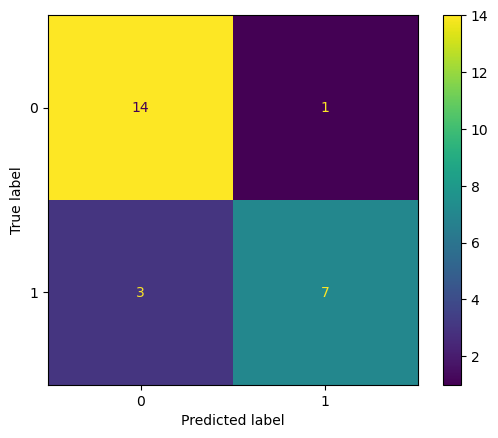

In [141]:
display(HTML("<h2 style='font-size:20px;'>Gráficas</h1>"))
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

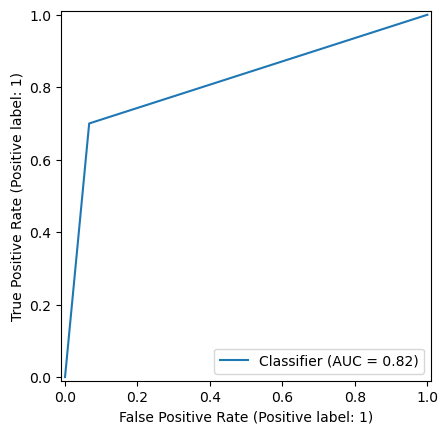

In [143]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## Desempeño del Modelo

### Precisión
La precisión indica el porcentaje de predicciones correctas para las instancias positivas en comparación con todas las predicciones positivas.

**Ejemplo:** Si el modelo tiene una precisión de 0.75 para la clase "condición", significa que el 75% de las instancias predichas como positivas son correctas.

### Recall
Mide la proporción de verdaderos positivos sobre todas las instancias realmente positivas en el conjunto de datos.

**Ejemplo:** Un recall de 0.50 indica que el modelo identificó correctamente el 50% de todas las instancias positivas.

### F1 Score
Es la media armónica entre precisión y recall, proporcionando una métrica equilibrada de ambos aspectos.

**Ejemplo:** Un F1 de 0.60 significa que el modelo tiene un rendimiento equilibrado en términos de precisión y recall.

### Matriz de Confusión

#### Interpretación:
- **Verdaderos negativos (TN):** El número de instancias que el modelo clasificó correctamente como negativas.
- **Verdaderos positivos (TP):** Las instancias correctamente clasificadas como positivas.
- **Falsos positivos (FP):** Las instancias incorrectamente clasificadas como positivas.
- **Falsos negativos (FN):** Las instancias incorrectamente clasificadas como negativas.

### AUC y Curva de Precisión
**AUC (Area Under Curve):** Indica la capacidad del modelo para distinguir entre clases. Un AUC de 0.69, por ejemplo, significa que el modelo tiene un 69% de precisión al diferenciar las clases.
